In [113]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


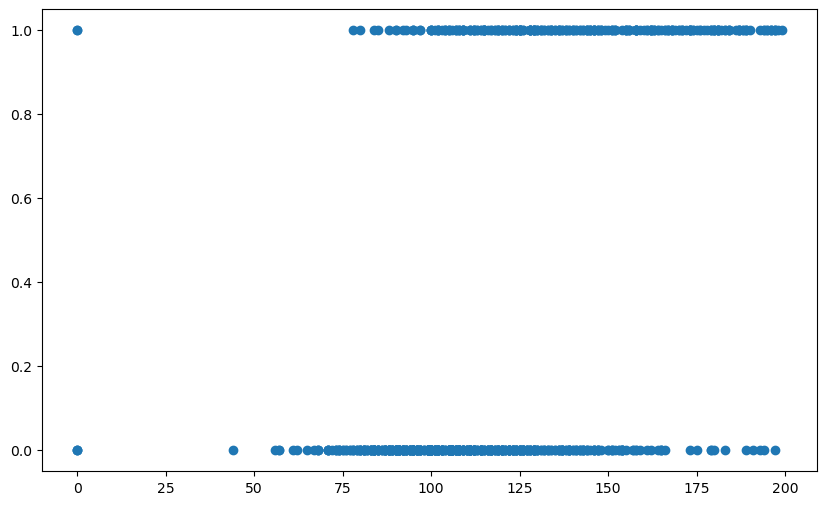

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.scatter(y=df["Outcome"],x=df["Glucose"])
plt.show()

In [115]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]
print(X,y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
score=lr.score(X_test,y_test)
print(f"The score of the model: {score*100: .2f}")

The score of the model:  74.03


In [118]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)
from sklearn.preprocessing import StandardScaler
sS = StandardScaler()
X_train = sS.fit_transform(X_train)
X_test = sS.transform(X_test)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
score=lr.score(X_test,y_test)
print(f"The score of the model: {score*100:.2f}")

The score of the model: 74.68


In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[90 10]
 [29 25]]


In [121]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)
X_train = sS.fit_transform(X_train)
X_test = sS.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
score = knn.score(X_test,y_test)
print(f"The score of the model: {score*100:.2f}")

The score of the model: 75.97


In [122]:
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)
X_train = sS.fit_transform(X_train)
X_test = sS.transform(X_test)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
score = dt.score(X_test,y_test)
print(f"The score of the model: {score*100:.2f}")

The score of the model: 66.88


In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = sS.fit_transform(X_train)
X_test = sS.transform(X_test)
scores = []
for depth in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=depth,random_state=42)
    dt.fit(X_train, y_train)
    prediction = dt.predict(X_test)
    score = dt.score(X_test,y_test)
    scores.append(score)
print(f"The score of the model: {100*max(scores):.2f}")

The score of the model: 79.22


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train,y_train)
prediction = rf_model.predict(X_test)
score = accuracy_score(y_test,prediction)
print(f"The score of the model: {100*score:.2f}")

The score of the model: 72.08


In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, 10, None],      
    'min_samples_split': [2, 5, 10]      
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: %{grid_search.best_score_ * 100:.2f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score: %78.18


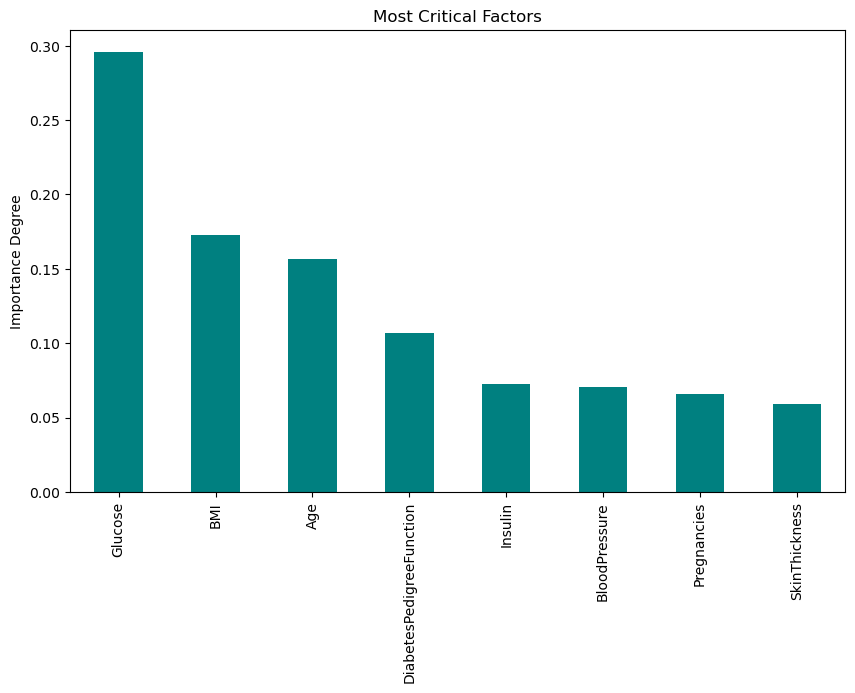

In [126]:
best_rf = grid_search.best_estimator_

importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importance.plot(kind='bar', color='teal')
plt.title("Most Critical Factors")
plt.ylabel("Importance Degree")
plt.savefig('critical_factors_diabetes.png', dpi=300, bbox_inches='tight')
plt.show()

In [127]:
import numpy as np
clean_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
X[clean_cols] = X[clean_cols].replace(0, np.nan)
X[clean_cols] = X[clean_cols].fillna(X[clean_cols].mean())
X['G/I'] = X['Glucose']/X['Insulin']
print(X.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age       G/I  
0                     0.627   50  0.951473  
1                     0.351   31  0.546454  
2                     0.672   32  1.176484  
3                     0.167   21  0.946809  
4                     2.288   33  0.815476  


In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = sS.fit_transform(X_train)
X_test = sS.transform(X_test)

param_grid = {
    'n_estimators': [50,100,200,250], 
    'max_depth': [3, 5, 10, None],      
    'min_samples_split': [2, 5, 10]      
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: %{grid_search.best_score_ * 100:.2f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 250}
Best score: %77.86


In [153]:
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

clean_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
X[clean_cols] = X[clean_cols].replace(0, np.nan)
X[clean_cols] = X[clean_cols].fillna(X[clean_cols].mean())

X['G/I'] = X['Glucose'] / X['Insulin']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = sS.fit_transform(X_train)
X_test = sS.transform(X_test)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: %{grid_search.best_score_ * 100:.2f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 250}
Best score: %77.86
